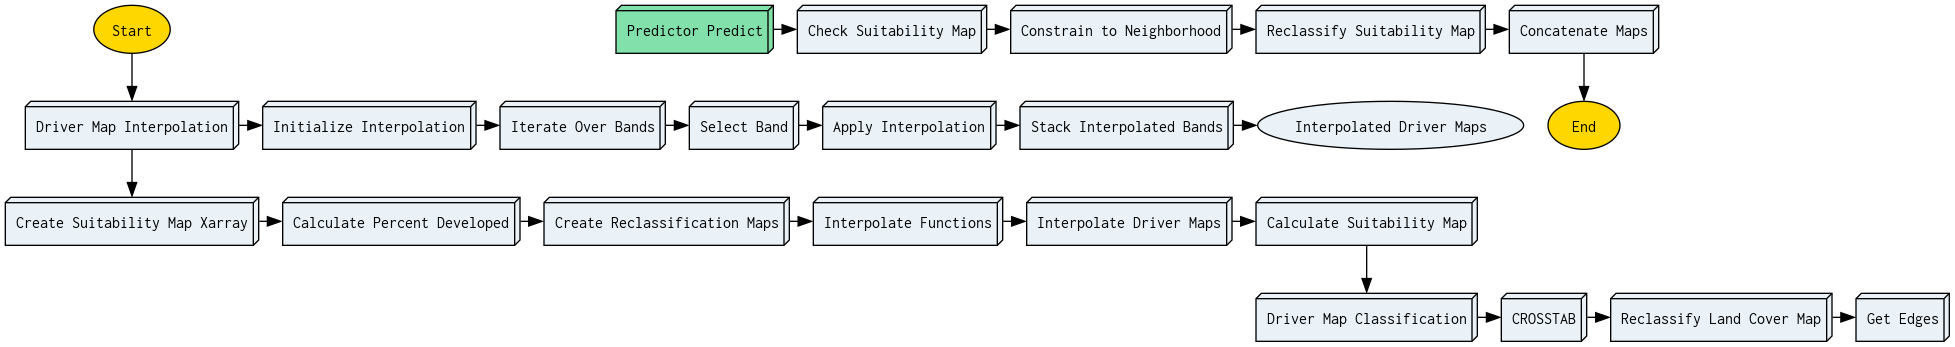

In [1]:
from graphviz import Digraph
from PIL import Image

def combined_combined_flowchart():
    dot = Digraph('GEOMOD_Flowchart', format='png', node_attr={'style': 'filled', 'fontname': 'Times-Roman', 'fontsize': '12'})

    dot.attr(size='50,45') 
    dot.attr(rankdir='TB')  

    # Set colors
    start_color = '#FFD700'  # orange
    process_color = '#EAF2F8'  # blue  
    process2_color = '#82E0AA'  # green 

    # Start
    dot.node('start', 'Start', shape='ellipse', style='filled', fillcolor=start_color, fontcolor='black')

    # Driver Map Interpolation Flowchart
    with dot.subgraph() as driver_interpolation:
        driver_interpolation.attr(rank='same')
        driver_interpolation.node('driver_map_interpolation', 'Driver Map Interpolation', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        driver_interpolation.node('init_interpolation', 'Initialize Interpolation', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        driver_interpolation.node('iterate_bands', 'Iterate Over Bands', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        driver_interpolation.node('select_band', 'Select Band', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        driver_interpolation.node('apply_interpolation', 'Apply Interpolation', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        driver_interpolation.node('stack_bands', 'Stack Interpolated Bands', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        driver_interpolation.node('interpolated_driver_maps', 'Interpolated Driver Maps', shape='ellipse', style='filled', fillcolor=process_color, fontcolor='black')

    # Suitability Map Flowchart
    with dot.subgraph() as suitability_map_flow:
        suitability_map_flow.attr(rank='same')
        suitability_map_flow.node('create_suitability_map', 'Create Suitability Map Xarray', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        suitability_map_flow.node('calculate_percent_developed', 'Calculate Percent Developed', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        suitability_map_flow.node('create_reclass_maps', 'Create Reclassification Maps', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        suitability_map_flow.node('interpolate_functions', 'Interpolate Functions', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        suitability_map_flow.node('interpolate_driver_maps', 'Interpolate Driver Maps', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        suitability_map_flow.node('calculate_suitability_map', 'Calculate Suitability Map', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')

    # Predictor Flowchart
    with dot.subgraph() as predictor_predict_flow:
        predictor_predict_flow.attr(rank='same')
        predictor_predict_flow.node('predictor_predict', 'Predictor Predict', shape='box3d', style='filled', fillcolor=process2_color, fontcolor='black')
        predictor_predict_flow.node('check_suitability_map', 'Check Suitability Map', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        predictor_predict_flow.node('constrain_neighborhood', 'Constrain to Neighborhood', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        predictor_predict_flow.node('reclassify_suitability_map', 'Reclassify Suitability Map', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        predictor_predict_flow.node('concatenate_maps', 'Concatenate Maps', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')

    # Utility Flowchart
    with dot.subgraph() as utility_script_flow:
        utility_script_flow.attr(rank='same')
        utility_script_flow.node('driver_map_classification', 'Driver Map Classification', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        utility_script_flow.node('CROSSTAB', 'CROSSTAB', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        utility_script_flow.node('reclassify_landcover_map', 'Reclassify Land Cover Map', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')
        utility_script_flow.node('get_edges', 'Get Edges', shape='box3d', style='filled', fillcolor=process_color, fontcolor='black')

    # End
    dot.node('end', 'End', shape='ellipse', style='filled', fillcolor=start_color, fontcolor='black')

    # Edges
    dot.edge('start', 'driver_map_interpolation')
    dot.edge('driver_map_interpolation', 'init_interpolation')
    dot.edge('init_interpolation', 'iterate_bands')
    dot.edge('iterate_bands', 'select_band')
    dot.edge('select_band', 'apply_interpolation')
    dot.edge('apply_interpolation', 'stack_bands')
    dot.edge('stack_bands', 'interpolated_driver_maps')

    dot.edge('driver_map_interpolation', 'create_suitability_map')
    dot.edge('create_suitability_map', 'calculate_percent_developed')
    dot.edge('calculate_percent_developed', 'create_reclass_maps')
    dot.edge('create_reclass_maps', 'interpolate_functions')
    dot.edge('interpolate_functions', 'interpolate_driver_maps')
    dot.edge('interpolate_driver_maps', 'calculate_suitability_map')

    dot.edge('calculate_suitability_map', 'driver_map_classification')
    dot.edge('driver_map_classification', 'CROSSTAB')
    dot.edge('CROSSTAB', 'reclassify_landcover_map')
    dot.edge('reclassify_landcover_map', 'get_edges')

    dot.edge('predictor_predict', 'check_suitability_map')
    dot.edge('check_suitability_map', 'constrain_neighborhood')
    dot.edge('constrain_neighborhood', 'reclassify_suitability_map')
    dot.edge('reclassify_suitability_map', 'concatenate_maps')
    dot.edge('concatenate_maps', 'end')

    return dot

if __name__ == "__main__":
    dot = combined_combined_flowchart()
    dot.render('GEOMOD_Flowchart', format='png', cleanup=True)
    
    img = Image.open('GEOMOD_Flowchart.png')
    img.show()
